In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# ================loding MNIST dataset===================================
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load data
plt.imshow(x_train[0], cmap="gray")
plt.show()

x_train_expand = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1))
# print("x_train_expand.shape: ", x_train_expand.shape) #(60000, 28, 28, 1)
x_train_expand = x_train_expand.astype('float16')
x_test_expand = x_test_expand.astype('float16')
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


input_shape = (28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 32)
y_test = tf.keras.utils.to_categorical(y_test, 32)

# create generator to center images
# datagen = ImageDataGenerator(featurewise_center=True)
# calculate mean on training dataset
# datagen.fit(x_train)
# prepare an iterators to scale images
# x_train_iterator = datagen.flow(x_train, y_train, batch_size=16)
# x_test_iterator = datagen.flow(x_test, y_test, batch_size=16)
# x_test_iterator = datagen.flow(x_test, y_test, batch_size=16)
# print('Batches train=%d, test=%d' % (len(x_train_iterator), len(x_test_iterator)))

# =======================================================================
model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])
model.summary()
# =====================The following code is out of order================
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0000001),
              loss="categorical_crossentropy", metrics=["accuracy"])
#               , optimizer="adam" 0.0000001  0.01
#              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
#              metrics = ['sparse_categorical_accuracy']) # enter the parameter by yourself

# =====================build the cnn model here==========================

# =====================end of building cnn model=========================


model_history = model.fit(x_train_expand, y_train, batch_size=100, validation_split=0.5, epochs=5)
# fit model with generator
# model_history = model.fit(x_train_iterator, steps_per_epoch=len(x_train_iterator), epochs=5)


print(model_history.history.keys())
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
# val_loss = model_history.history['accuracy']

# test_loss, test_acc = model.evaluate(x_test_iterator, steps=len(x_test_iterator), verbose=0)
test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)

predictions = model.predict([x_test_expand])  # Make prediction
# x_test = tf.reshape(x_test,[-1])

plt.imshow(x_test[565, :, :, :].squeeze(), cmap="gray")
plt.show()
print("Print out the number:", np.argmax(predictions[565]))  # Print out the number

epochs = range(5)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
# plt.plot(loss, 'r', label='Training loss')
# plt.plot(val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 10])
# plt.xlim([0,5])
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()


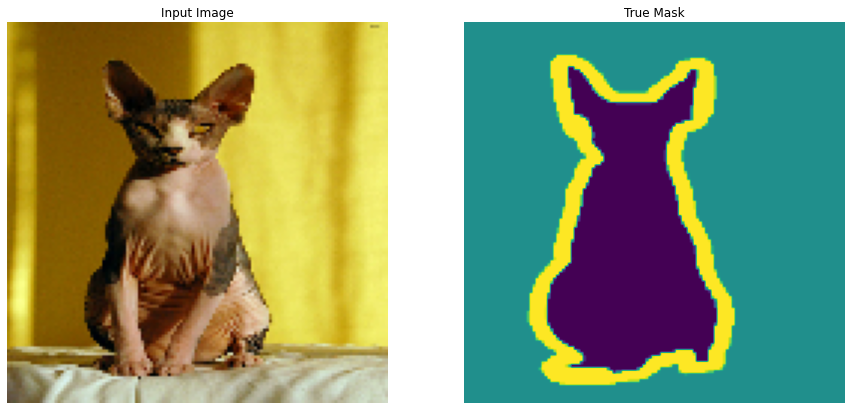

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
up_sampling2d_18 (UpSampling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_transpose_58 (Conv2DT (None, 64, 64, 64)        36928     
_________________________________________________________________
up_sampling2d_19 (UpSampling (None, 128, 128, 64)    

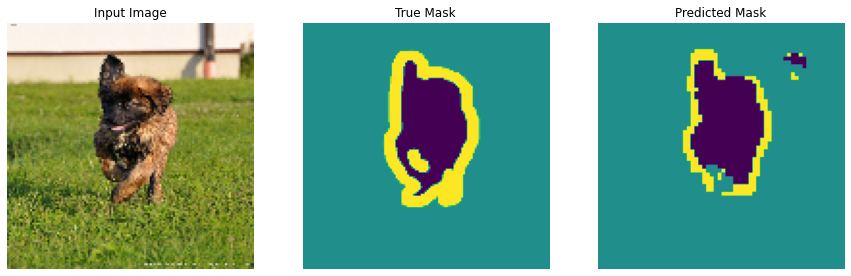

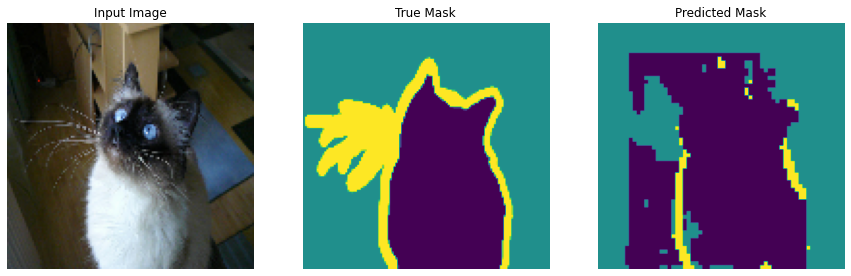

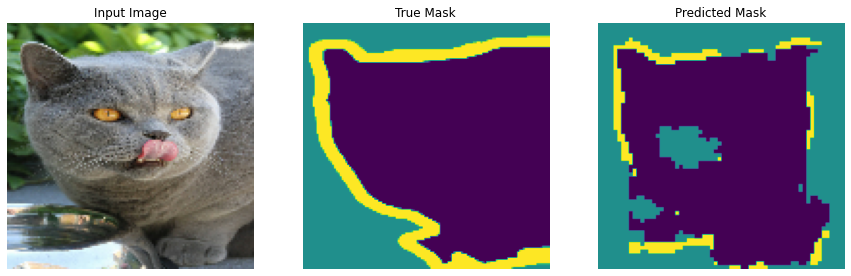

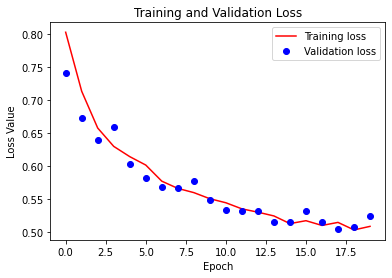

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
# tfds.disable_progress_bar()
from IPython.display import clear_output
import matplotlib.pyplot as plt
import drive.MyDrive.Utility as Utility
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


#=======================loading dataset======================================
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(Utility.load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(Utility.load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)
# print("test shape:", test_dataset)
for image, mask in train.take(5):
    sample_image, sample_mask = image, mask
Utility.display([sample_image, sample_mask])

#====================end of loading data======================================

#=====================The following code is out of order======================

#=====================build the cnn model here===============================
input_shape = (128,128, 3)
# model = unet_model(OUTPUT_CHANNELS)
model = tf.keras.Sequential([
# build your CNN model here
    tf.keras.Input(shape=input_shape),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 16,kernel_size=(3,3),strides=(2,2),padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 32,kernel_size=(3,3),strides=(1,1),padding = 'same', activation="relu", dilation_rate=(2,2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 64,kernel_size=(3,3),strides=(1,1),padding = 'same',  activation="relu", dilation_rate=(2,2)),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='relu'),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='softmax', dilation_rate=(2,2))
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0015),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(reduction='none'),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#categorical_crossentropy 0.000000001 0.0000001 0.01
#=====================end of building cnn model==============================

# def show_predictions(dataset=None, num=2):
#     if dataset:
#         for image, mask in dataset.take(num):
#             pred_mask = model.predict(image)
#             display([image[0], mask[0], create_mask(pred_mask)])
#     else:
        # display([sample_image, sample_mask,
        #      Utility.create_mask(model.predict(sample_image[tf.newaxis, ...]))])

EPOCHS = 20

VAL_SUBSPLITS = 5

VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS
model_history = model.fit( train_dataset,  epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset
                          # callbacks=[Utility.DisplayCallback()]
                          )
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

for image, mask in test_dataset.take(3):
    pred_mask = model.predict(image)
    display_list = [image[0], mask[0], Utility.create_mask(tf.constant(pred_mask))]
    Utility.display(display_list)

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
model.add(Conv2D(16, (3,3), activation ='relu', strides=2, padding='same', input_shape=[128,128,3]))
model.add(Conv2D(32,(3,3), activation ='relu', strides=1, padding='same', input_shape=[64,64,16], dilation_rate=2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu', strides=1, padding='same', input_shape=[32,32,32], dilation_rate=2))
# model.add(UpSampling2D(size=(2, 2), data_format=None))
model.add(Conv2DTranspose(64,(3,3), activation='relu', strides=1, padding='same', input_shape=[64,64,64]))
# model.add(UpSampling2D(size=(2, 2), data_format=None))
model.add(Conv2DTranspose(3,(3,3), activation='softmax', strides=1, padding='same', input_shape=[128,128,64], dilation_rate=2))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
